In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/who-is-the-real-winner/sample_submission.csv
/kaggle/input/who-is-the-real-winner/train.csv
/kaggle/input/who-is-the-real-winner/test.csv


In [2]:
import pandas as pd

# Load CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/who-is-the-real-winner/train.csv')


In [3]:
df

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass
...,...,...,...,...,...,...,...,...,...
2054,2054,V. Sasi,CHIRAYINKEEZHU,CPI,1,61 Lac+,10 Lac+,KERALA,Graduate Professional
2055,2055,Pushkar Lal Dangi,MAVLI,INC,0,2 Crore+,8 Lac+,RAJASTHAN,10th Pass
2056,2056,Dr. Manju Shiwach,MODI NAGAR,BJP,0,13 Crore+,85 Lac+,UTTAR PRADESH,Graduate
2057,2057,Mansing Fattesingrao Naik,SHIRALA,NCP,1,25 Crore+,94 Lac+,MAHARASHTRA,12th Pass


In [4]:
#import sdv
#import sdv.metadata
#metadata = sdv.metadata.get_table_metadata(df)

In [5]:
df.dtypes

ID                 int64
Candidate         object
Constituency ∇    object
Party             object
Criminal Case      int64
Total Assets      object
Liabilities       object
state             object
Education         object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2059 non-null   int64 
 1   Candidate       2059 non-null   object
 2   Constituency ∇  2059 non-null   object
 3   Party           2059 non-null   object
 4   Criminal Case   2059 non-null   int64 
 5   Total Assets    2059 non-null   object
 6   Liabilities     2059 non-null   object
 7   state           2059 non-null   object
 8   Education       2059 non-null   object
dtypes: int64(2), object(7)
memory usage: 144.9+ KB


In [7]:
df.describe()

,ID,Criminal Case
count,2059.000000,2059.000000
mean,1029.000000,1.777562
std,594.526422,4.762183
min,0.000000,0.000000
25%,514.500000,0.000000
50%,1029.000000,0.000000
75%,1543.500000,2.000000
max,2058.000000,87.000000


In [8]:
print("Column names:", df.columns)

Column names: Index(['ID', 'Candidate', 'Constituency ∇', 'Party', 'Criminal Case',
       'Total Assets', 'Liabilities', 'state', 'Education'],
      dtype='object')


In [9]:
df['Party'].value_counts()

# # Print the unique values
# print("Unique values in the column:")
# for value in unique_values:
#     print(value)

Party
BJP                         862
INC                         365
AITC                        130
AAP                          94
YSRCP                        86
DMK                          73
BJD                          65
SP                           62
CPI(M)                       43
RJD                          42
IND                          38
NCP                          34
AIADMK                       34
JD(U)                        32
SHS                          29
NPP                          20
JMM                          14
NDPP                          9
TDP                           8
JD(S)                         7
Sikkim Krantikari Morcha      5
CPI                           4
Tipra Motha Party             3
Name: count, dtype: int64

In [10]:
a = df['Constituency ∇']

In [11]:
import numpy as np

In [12]:
len(np.unique(a))

2037

In [13]:
unique_values_counts = df['Education'].value_counts()

# Get the number of unique values
num_unique_values = len(unique_values_counts)
print("Number of unique values:", num_unique_values)
print("Unique values and their counts:")
print(unique_values_counts)

Number of unique values: 10
Unique values and their counts:
Education
Graduate                 531
Post Graduate            432
12th Pass                349
Graduate Professional    339
10th Pass                227
8th Pass                  78
Doctorate                 52
Others                    28
Literate                  14
5th Pass                   9
Name: count, dtype: int64


In [14]:
print(df['Education'].unique())

['8th Pass' '12th Pass' 'Post Graduate' 'Graduate Professional' 'Graduate'
 '10th Pass' 'Others' 'Doctorate' 'Literate' '5th Pass']


In [15]:
df['SC'] = df['Constituency ∇'].apply(lambda x: 1 if 'SC' in x else 0)
df['ST'] = df['Constituency ∇'].apply(lambda x: 1 if 'ST' in x else 0)

In [16]:
df['Doctor'] = df['Candidate'].apply(lambda x: 1 if 'Dr.' in x else 0)
df['Advocate'] = df['Candidate'].apply(lambda x: 1 if 'Adv.' in x else 0)


In [17]:
import re
def extract_string(text):
    return re.sub(r'\d+', '', text).strip()

# Apply the function to the column and count unique values
unique_strings = df['Total Assets'].apply(extract_string).unique()
num_unique_strings = len(unique_strings)

print("Number of unique strings ignoring numbers:", num_unique_strings)
print("Unique strings:", unique_strings)

Number of unique strings ignoring numbers: 4
Unique strings: ['Crore+' '' 'Lac+' 'Thou+']


In [18]:
import pandas as pd

# Assuming df is your DataFrame and 'Income' is the column containing income values
def parse_income(income_str):
    if 'Crore' in income_str:
        value_str = income_str.split(' Crore')[0]
        return float(value_str) * 10**7
    elif 'Lac' in income_str:
        value_str = income_str.split(' Lac')[0]
        return float(value_str) * 10**5
    elif 'Thou'in income_str:
        value_str = income_str.split('Thou')[0]
        return float(value_str) * 10**3
    else:
        return 0

# Convert and replace the 'Income' column
df['Total Assets'] = df['Total Assets'].apply(parse_income)
df['Liabilities'] = df['Liabilities'].apply(parse_income)



In [19]:
df_test = pd.read_csv('/kaggle/input/who-is-the-real-winner/test.csv')

In [20]:
df_test['Total Assets'] = df_test['Total Assets'].apply(parse_income)
df_test['Liabilities'] = df_test['Liabilities'].apply(parse_income)


In [21]:
df_test['SC'] = df_test['Constituency ∇'].apply(lambda x: 1 if 'SC' in x else 0)
df_test['ST'] = df_test['Constituency ∇'].apply(lambda x: 1 if 'ST' in x else 0)

In [22]:
df_test['Doctor'] = df_test['Candidate'].apply(lambda x: 1 if 'Dr.' in x else 0)
df_test['Advocate'] = df_test['Candidate'].apply(lambda x: 1 if 'Adv.' in x else 0)


In [23]:
df_test.describe()

,ID,Criminal Case,Total Assets,Liabilities,SC,ST,Doctor,Advocate
count,1374.000000,1374.000000,1.374000e+03,1.374000e+03,1374.000000,1374.000000,1374.000000,1374.000000
mean,686.500000,1.855895,1.250382e+08,2.526648e+07,0.127365,0.120815,0.037118,0.007278
std,396.783946,6.701603,5.453543e+08,1.452412e+08,0.333503,0.326031,0.189120,0.085031
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,343.250000,0.000000,9.150000e+06,1.000000e+05,0.000000,0.000000,0.000000,0.000000
50%,686.500000,0.000000,3.000000e+07,2.100000e+06,0.000000,0.000000,0.000000,0.000000
75%,1029.750000,2.000000,8.750000e+07,9.375000e+06,0.000000,0.000000,0.000000,0.000000
max,1373.000000,173.000000,1.413000e+10,2.830000e+09,1.000000,1.000000,1.000000,1.000000


In [24]:
party_encoded = pd.get_dummies(df['Party'], prefix='Party')

# Concatenate the original DataFrame with the one-hot encoded party columns
df_encoded = pd.concat([df, party_encoded], axis=1)

# Drop the original 'Party' column
df_encoded.drop('Party', axis=1, inplace=True)

# Print the updated DataFrame with one-hot encoded party columns

df_encoded.drop('Constituency ∇', axis=1, inplace=True)
df_encoded.drop('Candidate', axis=1 , inplace=True)
print(df_encoded)

        ID  Criminal Case  Total Assets  Liabilities              state  \
0        0              4  2.110000e+09   20000000.0         TAMIL NADU   
1        1              0  1.000000e+07          0.0     MADHYA PRADESH   
2        2              0  7.000000e+07    2200000.0          KARNATAKA   
3        3              0  9.000000e+07    2400000.0              BIHAR   
4        4              2  2.000000e+07    6100000.0        WEST BENGAL   
...    ...            ...           ...          ...                ...   
2054  2054              1  6.100000e+06    1000000.0             KERALA   
2055  2055              0  2.000000e+07     800000.0          RAJASTHAN   
2056  2056              0  1.300000e+08    8500000.0      UTTAR PRADESH   
2057  2057              1  2.500000e+08    9400000.0        MAHARASHTRA   
2058  2058              0  1.100000e+06          0.0  ARUNACHAL PRADESH   

                  Education  SC  ST  Doctor  Advocate  ...  Party_NCP  \
0                  8th Pas

In [25]:
party_encoded = pd.get_dummies(df_test['Party'], prefix='Party')

# Concatenate the original DataFrame with the one-hot encoded party columns
df_encoded_2 = pd.concat([df_test, party_encoded], axis=1)

# Drop the original 'Party' column
df_encoded_2.drop('Party', axis=1, inplace=True)

# Print the updated DataFrame with one-hot encoded party columns

df_encoded_2.drop('Constituency ∇', axis=1, inplace=True)
df_encoded_2.drop('Candidate', axis=1 , inplace=True)
print(df_encoded_2)

        ID  Criminal Case  Total Assets  Liabilities             state  SC  \
0        0              2   700000000.0  110000000.0       MAHARASHTRA   0   
1        1              1    20000000.0    1300000.0       WEST BENGAL   0   
2        2              3   490000000.0   10000000.0       MAHARASHTRA   0   
3        3              1    20000000.0          0.0       WEST BENGAL   0   
4        4              0   160000000.0   20000000.0     UTTAR PRADESH   0   
...    ...            ...           ...          ...               ...  ..   
1369  1369              0    10000000.0          0.0       WEST BENGAL   0   
1370  1370              1           0.0    1300000.0            ODISHA   0   
1371  1371              1    50000000.0          0.0             BIHAR   0   
1372  1372              1    20000000.0     500000.0  HIMACHAL PRADESH   0   
1373  1373              0    90000000.0          0.0      CHHATTISGARH   0   

      ST  Doctor  Advocate  Party_AAP  ...  Party_NCP  Party_ND

In [26]:
state_encoded = pd.get_dummies(df_encoded['state'], prefix='state')

# Concatenate the original DataFrame with the one-hot encoded state columns
df_encoded = pd.concat([df_encoded, state_encoded], axis=1)

# Drop the original 'State' column
df_encoded.drop('state', axis=1, inplace=True)

# Print the updated DataFrame with one-hot encoded state columns
print(df_encoded)

        ID  Criminal Case  Total Assets  Liabilities              Education  \
0        0              4  2.110000e+09   20000000.0               8th Pass   
1        1              0  1.000000e+07          0.0              12th Pass   
2        2              0  7.000000e+07    2200000.0          Post Graduate   
3        3              0  9.000000e+07    2400000.0          Post Graduate   
4        4              2  2.000000e+07    6100000.0               8th Pass   
...    ...            ...           ...          ...                    ...   
2054  2054              1  6.100000e+06    1000000.0  Graduate Professional   
2055  2055              0  2.000000e+07     800000.0              10th Pass   
2056  2056              0  1.300000e+08    8500000.0               Graduate   
2057  2057              1  2.500000e+08    9400000.0              12th Pass   
2058  2058              0  1.100000e+06          0.0               Graduate   

      SC  ST  Doctor  Advocate  Party_AAP  ...  sta

In [27]:
state_encoded = pd.get_dummies(df_encoded_2['state'], prefix='state')

# Concatenate the original DataFrame with the one-hot encoded state columns
df_encoded_2 = pd.concat([df_encoded_2, state_encoded], axis=1)

# Drop the original 'State' column
df_encoded_2.drop('state', axis=1, inplace=True)

# Print the updated DataFrame with one-hot encoded state columns
print(df_encoded_2)

        ID  Criminal Case  Total Assets  Liabilities  SC  ST  Doctor  \
0        0              2   700000000.0  110000000.0   0   0       0   
1        1              1    20000000.0    1300000.0   0   0       0   
2        2              3   490000000.0   10000000.0   0   0       0   
3        3              1    20000000.0          0.0   0   0       0   
4        4              0   160000000.0   20000000.0   0   0       0   
...    ...            ...           ...          ...  ..  ..     ...   
1369  1369              0    10000000.0          0.0   0   0       0   
1370  1370              1           0.0    1300000.0   0   0       0   
1371  1371              1    50000000.0          0.0   0   0       0   
1372  1372              1    20000000.0     500000.0   0   0       0   
1373  1373              0    90000000.0          0.0   0   0       0   

      Advocate  Party_AAP  Party_AIADMK  ...  state_ODISHA  state_PUDUCHERRY  \
0            0      False         False  ...         Fa

In [28]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
X_train = df_encoded.drop(['Education'], axis=1)
X_train.drop(columns=['ID'], inplace=True)
# Selecting the target variable (y), which is the 'Education' column
Y_train = df_encoded['Education']
df_encoded_2.drop(columns=['ID'], inplace=True)

In [29]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, 20)}  # Example: Searching depths from 1 to 10

# Create the DecisionTreeClassifier
tree = DecisionTreeClassifier()
scoring = make_scorer(f1_score, average='weighted')
# Set up the grid search with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring=scoring)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 20)},
             scoring=make_scorer(f1_score, average=weighted))

In [30]:
best_max_depth = grid_search.best_params_['max_depth']
print("Best max_depth:", best_max_depth)

Best max_depth: 16


In [31]:
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 18).fit(X_train,Y_train) 
dtree_predictions = dtree_model.predict(df_encoded_2) 
print(dtree_predictions)


['12th Pass' 'Graduate' 'Graduate' ... 'Graduate' 'Graduate Professional'
 'Graduate']


In [32]:
predicted_df = pd.DataFrame({'ID': df_test['ID'], 'Education': dtree_predictions})

# Set the 'ID' column as the index
predicted_df.set_index('ID', inplace=True)

# Print the DataFrame
print(predicted_df)



                  Education
ID                         
0                 12th Pass
1                  Graduate
2                  Graduate
3                  Graduate
4                 10th Pass
...                     ...
1369               Graduate
1370               Graduate
1371               Graduate
1372  Graduate Professional
1373               Graduate

[1374 rows x 1 columns]


In [33]:
count = predicted_df['Education'].value_counts()['Graduate']
print("Number of occurrences of 'string_to_count':", count)

Number of occurrences of 'string_to_count': 746


In [34]:
predicted_df.to_csv('predicted_education.csv')

## Making the data uniform to predict minority classes

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)



In [36]:
Y_train.head()

0         8th Pass
1        12th Pass
2    Post Graduate
3    Post Graduate
4         8th Pass
Name: Education, dtype: object

In [37]:
unique_values_counts = y_resampled.value_counts()

# Print the unique values and their counts
print(unique_values_counts)

Education
8th Pass                 531
12th Pass                531
Post Graduate            531
Graduate Professional    531
Graduate                 531
10th Pass                531
Others                   531
Doctorate                531
Literate                 531
5th Pass                 531
Name: count, dtype: int64


In [38]:
X_train

,Criminal Case,Total Assets,Liabilities,SC,ST,Doctor,Advocate,Party_AAP,Party_AIADMK,Party_AITC,...,state_ODISHA,state_PUDUCHERRY,state_PUNJAB,state_RAJASTHAN,state_SIKKIM,state_TAMIL NADU,state_TRIPURA,state_UTTAR PRADESH,state_UTTARAKHAND,state_WEST BENGAL
0,4,2.110000e+09,20000000.0,0,0,0,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,1.000000e+07,0.0,1,0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,7.000000e+07,2200000.0,0,0,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,9.000000e+07,2400000.0,0,0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,2.000000e+07,6100000.0,1,0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,1,6.100000e+06,1000000.0,0,0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2055,0,2.000000e+07,800000.0,0,0,0,0,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2056,0,1.300000e+08,8500000.0,0,0,1,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2057,1,2.500000e+08,9400000.0,0,0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Scaling the data

In [39]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler().set_output(transform="pandas")
X_plot_scaled = scaler.fit_transform(X_train)
X_test_plot_scaled = scaler.fit_transform(df_encoded_2)

In [40]:
X_plot_scaled.describe()

,Criminal Case,Total Assets,Liabilities,SC,ST,Doctor,Advocate,Party_AAP,Party_AIADMK,Party_AITC,...,state_ODISHA,state_PUDUCHERRY,state_PUNJAB,state_RAJASTHAN,state_SIKKIM,state_TAMIL NADU,state_TRIPURA,state_UTTAR PRADESH,state_UTTARAKHAND,state_WEST BENGAL
count,2.059000e+03,2.059000e+03,2.059000e+03,2.059000e+03,2.059000e+03,2.059000e+03,2.059000e+03,2.059000e+03,2.059000e+03,2.059000e+03,...,2.059000e+03,2.059000e+03,2.059000e+03,2.059000e+03,2.059000e+03,2.059000e+03,2.059000e+03,2.059000e+03,2.059000e+03,2.059000e+03
mean,-1.380365e-17,1.380365e-17,3.450912e-18,-9.835099e-17,-4.831276e-17,-9.748826e-17,6.901824e-18,1.380365e-17,3.450912e-18,-2.243093e-17,...,6.901824e-17,-1.725456e-18,-6.039096e-18,3.968549e-17,1.207819e-17,5.176368e-17,3.450912e-18,5.866550e-17,-1.725456e-18,3.105821e-17
std,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,...,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00
min,-3.733569e-01,-2.348970e-01,-1.054173e-01,-4.121727e-01,-3.458760e-01,-1.687351e-01,-8.274035e-02,-2.187171e-01,-1.295767e-01,-2.596005e-01,...,-2.100420e-01,-7.328775e-02,-1.819778e-01,-2.282993e-01,-4.933837e-02,-2.454530e-01,-1.315009e-01,-3.493864e-01,-1.389494e-01,-3.009519e-01
25%,-3.733569e-01,-2.155930e-01,-1.051805e-01,-4.121727e-01,-3.458760e-01,-1.687351e-01,-8.274035e-02,-2.187171e-01,-1.295767e-01,-2.596005e-01,...,-2.100420e-01,-7.328775e-02,-1.819778e-01,-2.282993e-01,-4.933837e-02,-2.454530e-01,-1.315009e-01,-3.493864e-01,-1.389494e-01,-3.009519e-01
50%,-3.733569e-01,-1.942571e-01,-9.662878e-02,-4.121727e-01,-3.458760e-01,-1.687351e-01,-8.274035e-02,-2.187171e-01,-1.295767e-01,-2.596005e-01,...,-2.100420e-01,-7.328775e-02,-1.819778e-01,-2.282993e-01,-4.933837e-02,-2.454530e-01,-1.315009e-01,-3.493864e-01,-1.389494e-01,-3.009519e-01
75%,4.672061e-02,-7.233729e-02,-6.196275e-02,-4.121727e-01,-3.458760e-01,-1.687351e-01,-8.274035e-02,-2.187171e-01,-1.295767e-01,-2.596005e-01,...,-2.100420e-01,-7.328775e-02,-1.819778e-01,-2.282993e-01,-4.933837e-02,-2.454530e-01,-1.315009e-01,-3.493864e-01,-1.389494e-01,-3.009519e-01
max,1.790001e+01,2.551049e+01,4.290975e+01,2.426167e+00,2.891209e+00,5.926450e+00,1.208600e+01,4.572117e+00,7.717436e+00,3.852072e+00,...,4.760952e+00,1.364485e+01,5.495177e+00,4.380214e+00,2.026820e+01,4.074100e+00,7.604510e+00,2.862161e+00,7.196865e+00,3.322790e+00


In [41]:
df_encoded_2.describe()

,Criminal Case,Total Assets,Liabilities,SC,ST,Doctor,Advocate
count,1374.000000,1.374000e+03,1.374000e+03,1374.000000,1374.000000,1374.000000,1374.000000
mean,1.855895,1.250382e+08,2.526648e+07,0.127365,0.120815,0.037118,0.007278
std,6.701603,5.453543e+08,1.452412e+08,0.333503,0.326031,0.189120,0.085031
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.150000e+06,1.000000e+05,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000e+07,2.100000e+06,0.000000,0.000000,0.000000,0.000000
75%,2.000000,8.750000e+07,9.375000e+06,0.000000,0.000000,0.000000,0.000000
max,173.000000,1.413000e+10,2.830000e+09,1.000000,1.000000,1.000000,1.000000


## Using KNN 

In [42]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)
scoring = make_scorer(f1_score, average='weighted')
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=9, scoring=scoring, return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train)

Fitting 9 folds for each of 99 candidates, totalling 891 fits


KeyboardInterrupt: 

In [ ]:
print(grid_search.best_params_)

In [ ]:

knn = KNeighborsClassifier(n_neighbors =12 ).fit(X_plot_scaled, Y_train) 
knn_predictions = knn.predict(X_test_plot_scaled) 

In [ ]:
predicted_df = pd.DataFrame({'ID': df_test['ID'], 'Education': knn_predictions})

# Set the 'ID' column as the index
predicted_df.set_index('ID', inplace=True)

# Print the DataFrame
print(predicted_df)


In [ ]:
predicted_df.to_csv('predicted_education_2.csv')

## Checking the correlation of variables

In [ ]:
from scipy.stats import f_oneway

# Assuming df is your DataFrame and 'target' is the name of the target column
correlations = {}
for column in df_encoded.columns:
    if column != 'Education':  # Exclude the target variable itself
        groups = [df_encoded[df_encoded['Education'] == category][column] for category in df_encoded['Education'].unique()]
        f_statistic, p_value = f_oneway(*groups)
        correlations[column] = f_statistic

In [ ]:
for feature, f_statistic in correlations.items():
    print(f"Feature: {feature}, F-statistic: {f_statistic}")

## Using Random Forest Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
# Define the parameter distributions
param_dist = {
    'n_estimators': randint(50, 500),
    'random_state': [42, 123, 456]
}

# Create the randomized search object
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=5)

# Perform the randomized search
random_search.fit(X_train, Y_train)

# Get the best parameters

In [ ]:
best_params = random_search.best_params_
print("Best parameters:", best_params)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=159, random_state=123)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Make predictions on the test data
predictions = rf_classifier.predict(df_encoded_2)

In [ ]:
predicted_df_3 = pd.DataFrame({'ID': df_test['ID'], 'Education': predictions})

# Set the 'ID' column as the index
predicted_df_3.set_index('ID', inplace=True)

# Print the DataFrame
print(predicted_df_3)


In [ ]:
predicted_df_3.to_csv('predicted_education_3.csv')

## Converting into a Regression Problem


In [ ]:
one_hot_encoded = pd.get_dummies(df['Education'])
from sklearn.linear_model import LinearRegression

# Assuming X is your feature matrix
# Iterate over each one-hot encoded target variable and fit a regression model
regression_models = {}
for column in one_hot_encoded.columns:
    # Fit a linear regression model to predict the column
    model = LinearRegression()
    model.fit(X_train, one_hot_encoded[column])
    regression_models[column] = model 

In [ ]:
predictions = {}
for column, model in regression_models.items():
    # Predict the column using the corresponding regression model
    predictions[column] = model.predict(df_encoded_2)

In [ ]:
predictions_df = pd.DataFrame(predictions)

# Print predictions DataFrame
print(predictions_df)

In [ ]:
predictions_df = pd.DataFrame(predictions)

# Get the class with the highest predicted value for each sample
predicted_classes = predictions_df.idxmax(axis=1)

# Convert predicted classes to DataFrame
predicted_classes_df = pd.DataFrame(predicted_classes, columns=['predicted_class'])

# Assuming 'ID' is the name of the ID column in X_test
# Add the 'ID' column from X_test to the predicted_classes_df DataFrame
predicted_classes_df.index.name = 'ID'
predicted_classes_df.columns = ['Education']
print(predicted_classes_df)

In [ ]:
predicted_classes_df.to_csv('predicted_classes_df.csv')

## Data Analysis

In [43]:
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame called 'constituency_data' containing constituency information,
# with columns 'Education', 'SC', and 'ST'

# Filter the DataFrame for SC and ST constituencies
sc_data = df_encoded[df_encoded['SC'] == 1]
st_data = df_encoded[df_encoded['ST'] == 1]

# Count the number of constituencies in each education category for SC and ST constituencies
sc_education_counts = sc_data['Education'].value_counts()
st_education_counts = st_data['Education'].value_counts()

# Plotting
fig = px.pie(sc_education_counts, values=sc_education_counts.values, names=sc_education_counts.index, title='Education Distribution in SC Constituencies')
fig.show()

fig = px.pie(st_education_counts, values=st_education_counts.values, names=st_education_counts.index, title='Education Distribution in ST Constituencies')
fig.show()
other_data = df_encoded[(df_encoded['SC'] == 0) & (df_encoded['ST'] == 0)]

# Count the number of constituencies in each education category for other constituencies
other_education_counts = df_encoded['Education'].value_counts()

# Plotting
fig = px.pie(other_education_counts, values=other_education_counts.values, names=other_education_counts.index, title='Education Distribution in Other Constituencies')
fig.show()


In [56]:
import plotly.express as px

# Assuming df is your DataFrame containing the data
# and 'Total Assets' and 'Liabilities' are the column names

fig = px.scatter(df, x='Total Assets', y='Liabilities', title='Scatter Plot of Total Assets vs Liabilities')
fig.show()



In [45]:
fig = px.box(df_encoded, x='Education', y='Liabilities', 
              title='Box Plot: Liabilities vs Education')
fig.show()

In [46]:

fig = px.box(df_encoded, x='Education', y='Total Assets', 
              title='Box Plot: Liabilities vs Education')
fig.show()

In [48]:
import plotly.express as px

# Assuming df is your DataFrame containing the data
# Replace 'Education' with the actual column name if different
# Assuming 'Education' column is encoded as numerical values

fig = px.scatter(df, x='Criminal Case', y='Liabilities', 
                 title='Scatter Plot: Liabilities vs Education')
fig.show()


In [49]:
import plotly.express as px

# Assuming df is your DataFrame containing the data
# Replace 'Education' with the actual column name if different
# Assuming 'Education' column is encoded as numerical values

fig = px.scatter(df, x='Criminal Case', y='Total Assets', 
                 title='Scatter Plot: Liabilities vs Education')
fig.show()


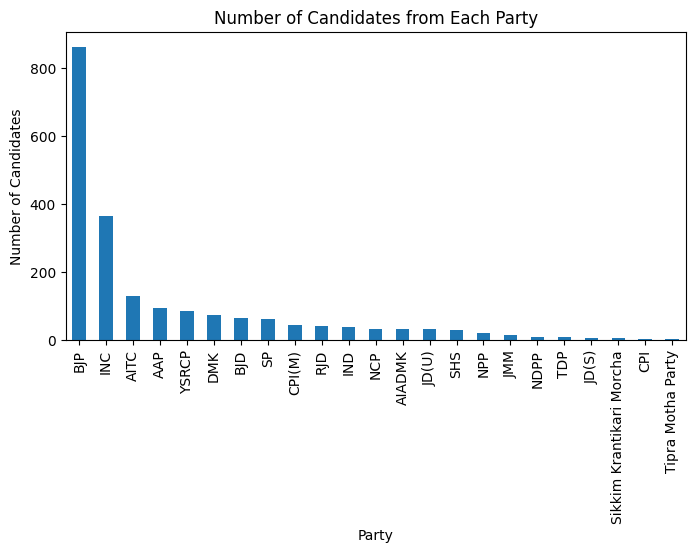

In [67]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
party_counts = df['Party'].value_counts()

plt.figure(figsize=(8,4))
party_counts.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Number of Candidates')
plt.title('Number of Candidates from Each Party')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [51]:
import plotly.express as px

# Assuming df is your DataFrame containing the data
# and 'Party' is the column containing the party names, and 'Criminal_Cases' is the column containing the number of criminal cases
party_criminal_counts = df[df['Criminal Case'] > 2]['Party'].value_counts()
fig = px.bar(x=party_criminal_counts.index, y=party_criminal_counts.values, labels={'x':'Party', 'y':'Number of Candidates'}, 
             title='Number of Candidates from Each Party with more than 2 Criminal Cases')
fig.show()


In [61]:
total_count = pd.Series(dtype=int)

# Calculate the total count of candidates from each party with more than 2 criminal cases
total_count = total_count.add(df[df['Criminal Case'] > 2]['Party'].value_counts(), fill_value=0)
print(total_count)

Party
AAP        10.0
AIADMK      1.0
AITC       20.0
BJD        12.0
BJP       103.0
CPI         1.0
CPI(M)     18.0
DMK        48.0
INC        77.0
IND         6.0
JD(S)       2.0
JD(U)       4.0
JMM         5.0
NCP         6.0
RJD        22.0
SHS        10.0
SP         22.0
YSRCP      24.0
dtype: float64


In [52]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame containing the data
# and 'Party' is the column containing the party names
# and 'Criminal_Case' is the column containing the number of criminal cases

# Step 1: Filter the DataFrame to include only candidates with more than 2 criminal cases
df_more_than_2_cases = df[df['Criminal Case'] > 2]

# Step 2: Count the number of candidates with more than 2 criminal cases per party
candidates_more_than_2_cases_per_party = df_more_than_2_cases['Party'].value_counts()

# Step 3: Calculate the percentage of candidates with more than 2 criminal cases relative to the total number of candidates per party
total_candidates_per_party = df['Party'].value_counts()
percentage_candidates_more_than_2_cases_per_party = (candidates_more_than_2_cases_per_party / total_candidates_per_party) * 100

# Step 4: Plot the result
fig = px.bar(x=percentage_candidates_more_than_2_cases_per_party.index, y=percentage_candidates_more_than_2_cases_per_party.values,
             labels={'x': 'Party', 'y': 'Percentage of Candidates with More than 2 Criminal Cases (%)'},
             title='Percentage of Candidates with More than 2 Criminal Cases from Each Party')
fig.show()



In [70]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df is your DataFrame containing the data
# and 'Party' is the column containing the party names
# 'Total_Assets' is the column containing total assets
# 'Liabilities' is the column containing liabilities

# Step 1: Calculate the net worth for each candidate
df['Net_Worth'] = df['Total Assets'] - df['Liabilities']

# Step 2: Group the candidates by party and calculate the mean net worth for each party
mean_net_worth_per_party = df.groupby('Party')['Net_Worth'].mean()

# Step 3: Calculate the average net worth across all parties
average_net_worth = mean_net_worth_per_party.mean()

# Step 4: Filter parties with net worth greater than average
above_average_parties = mean_net_worth_per_party[mean_net_worth_per_party > average_net_worth]

# Step 5: Normalize the mean net worth values to get the percentage distribution
percentage_distribution = (above_average_parties / above_average_parties.sum()) * 100

# Step 6: Plot the result
fig = go.Figure(data=[go.Bar(
    x=percentage_distribution.index,  # Party names
    y=percentage_distribution.values,  # Percentage values
)])

# Customize the layout
fig.update_layout(
    title="Percentage Distribution of Parties with Wealthiest Candidates (Above Average Net Worth)",
    xaxis_title="Party",
    yaxis_title="Percentage of Wealthiest Candidates (%)",
)

# Show the plot
fig.show()





In [54]:
average_criminal_cases = df['Criminal Case'].mean()
print("Average number of criminal cases:", average_criminal_cases)

Average number of criminal cases: 1.7775619232637203
